In [38]:
%matplotlib inline

import os
import cv2
import numpy as np
import glob

import matplotlib.pyplot as plt

In [39]:
IMAGE_PATH = '/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/imgs/'
SAVE_PATH = '/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/'

In [60]:
from shutil import copyfile

In [77]:
def rename_files(paths = IMAGE_PATH, save_path = SAVE_PATH, start = 0, repeated = True):
    if not repeated:
        path = paths

        for dirname, _, filenames in os.walk(path):
            for i, filename in enumerate(filenames):
                dst = os.path.join(save_path, "{0:04d}.png".format(i + start))
                src = os.path.join(dirname, filename)

                copyfile(src, dst)
    else:
        for path in paths:
            print("---",path,"---")
            for dirname, _, filenames in os.walk(path):
                for i, filename in enumerate(filenames):
                    dst = os.path.join(save_path, "{0:04d}.png".format(i + start))
                    src = os.path.join(dirname, filename)

                    copyfile(src, dst)

                    start += 1

In [83]:
def get_files(path) -> list[list[str]]:
    files = []
    files_path = []

    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            files.append(filename)
            files_path.append(dirname + filename)

    return [files, files_path]

In [88]:
def create_labels(path = IMAGE_PATH, save_path = SAVE_PATH):
    [files, files_path] = get_files(path)
    
    current = 0

    for file, file_path in zip(files, files_path):
        ori = cv2.pyrDown(cv2.imread(file_path, cv2.IMREAD_UNCHANGED))
        ori = cv2.cvtColor(ori, cv2.COLOR_BGRA2BGR)
        
        img = ori

        mask = np.zeros(img.shape[:2], np.uint8)

        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)

        rect = (0, 0, img.shape[1], 472)

        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 25, cv2.GC_INIT_WITH_RECT)

        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        img = img * mask2[:, :, np.newaxis]

        background = ori - img
        background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

        img = background + img

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

        bilateral = cv2.bilateralFilter(thresh1, 10, 75, 75)
        ret, thresh1 = cv2.threshold(bilateral, 0, 100, cv2.THRESH_BINARY_INV)
        
        cv2.imwrite(save_path + file, thresh1)

        current = current + 1

        print(f"{current} image of total {len(files)} images")
        print(save_path + file)

In [84]:
create_labels(IMAGE_PATH)

1 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0003.png
2 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0049.png
3 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0027.png
4 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0066.png
5 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0053.png
6 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0050.png
7 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0024.png
8 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0000.png
9 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0069.png
10 image of total 70 images
/home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/labels/0018.png
11 image 

In [81]:
def path_to_img(paths, flag=cv2.IMREAD_COLOR):
    imgs = []

    for path in paths:
        imgs.append(cv2.imread(path, flag))
        
    return imgs

In [166]:
def plot_labels(imgs, paths, n_row = 10, n_col = 10, figsize = (12, 12), bottom = 0.1, \
                right = 0.8, top = 0.9):
    
    _, axs = plt.subplots(n_row, n_col, figsize=figsize)
    axs = axs.flatten()

    for img, path, ax in zip(imgs, paths, axs):
        ax.title.set_text(os.path.split(path)[1])
        ax.imshow(img)

    plt.subplots_adjust(bottom = bottom, right = right, top = top)
    plt.show()

In [89]:
paths = get_files(SAVE_PATH)[1]
imgs = path_to_img(paths = paths, flag = cv2.IMREAD_GRAYSCALE)

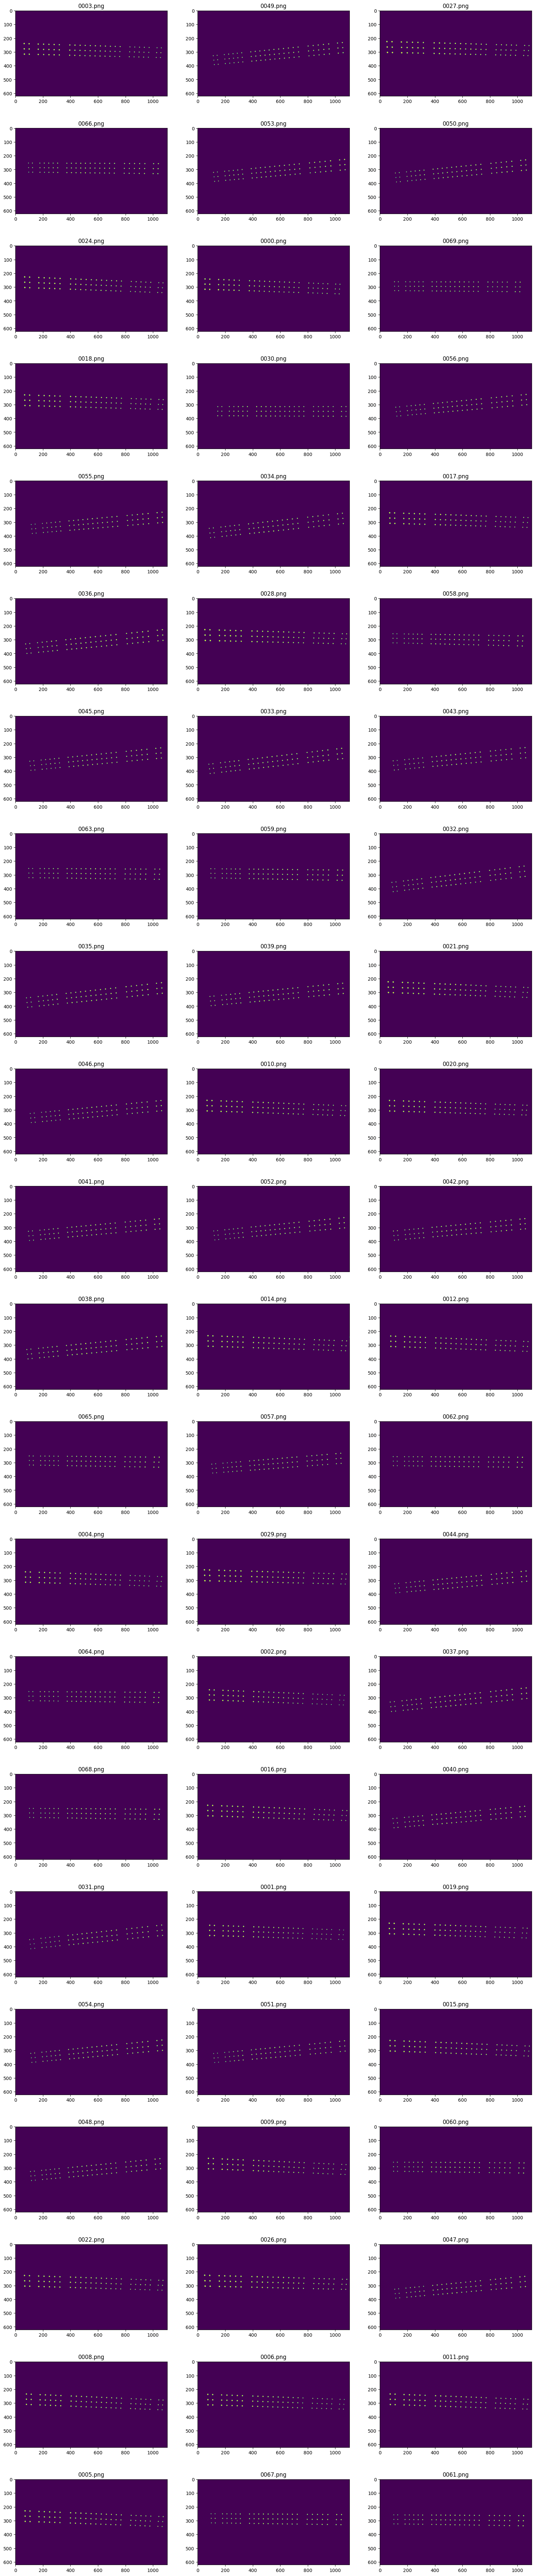

In [90]:
plot_labels(imgs = imgs, \
            paths = paths, \
            n_row = len(imgs) // 3, \
            n_col = 3, \
            figsize = (20, 100))

In [78]:
paths = [f"/home/enfycius/Documents/Prefab/end_{i}_fuzzy/end_{i}_fuzzy/imgs" for i in range(2, 5)]
save_path = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs"

In [79]:
rename_files(paths = paths, save_path = save_path, start = 70, repeated = True)

--- /home/enfycius/Documents/Prefab/end_2_fuzzy/end_2_fuzzy/imgs ---
--- /home/enfycius/Documents/Prefab/end_3_fuzzy/end_3_fuzzy/imgs ---
--- /home/enfycius/Documents/Prefab/end_4_fuzzy/end_4_fuzzy/imgs ---


In [89]:
IMAGE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/"
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/"

In [90]:
create_labels(path = IMAGE_PATH, save_path = SAVE_PATH)

1 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0228.png
2 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0340.png
3 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0111.png
4 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0124.png
5 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0003.png
6 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0194.png
7 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0210.png
8 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0306.png
9 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0075.png
10 image of total 245 images
/home/enfycius/Documents/LH_Dataset/Semantic_Segmenta

In [92]:
paths = get_files(SAVE_PATH)[1]
imgs = path_to_img(paths = paths, flag = cv2.IMREAD_GRAYSCALE)

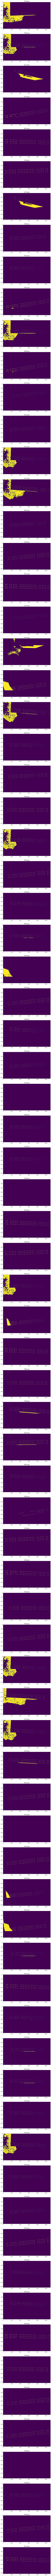

In [95]:
plot_labels(imgs = imgs, \
            paths = paths, \
            n_row = len(imgs) // 3, \
            n_col = 1, \
            figsize = (20, 500))

## Only Appropriately Labeled Image

In [205]:
IMAGE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/"
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/"

In [206]:
paths = get_files(IMAGE_PATH)[1]

In [207]:
paths

['/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0340.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0003.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0194.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0306.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0270.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0101.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0322.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0232.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0117.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0091.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0049.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0027.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0272.png',
 '/home/enfy

In [208]:
exist_label_img = []

In [209]:
for path in paths:
    exist_label_img.append(SAVE_PATH + np.os.path.split(path)[1])

In [210]:
exist_label_img

['/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0340.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0003.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0194.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0306.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0270.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0101.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0322.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0232.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0117.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0091.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0049.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0027.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labe

In [211]:
paths = exist_label_img

In [212]:
imgs = path_to_img(paths = paths, flag = cv2.IMREAD_GRAYSCALE)

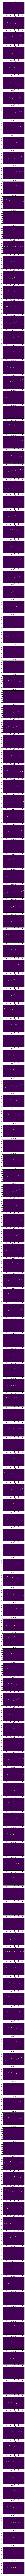

In [213]:
plot_labels(imgs = imgs, \
            paths = paths, \
            n_row = len(imgs), \
            n_col = 1, \
            figsize = (10, 550))